# Rotating edge experiment

In [82]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:

import numpy as np
from IPython.display import Image
from flat import rgba, font, shape, strike, document
from lineart import style, transform, draw
from lineart.primatives import EdgeCollection

In [84]:
e = np.array([
    [0,0,0],
    [1,1,0]
])
p = np.array([0,1,0])
o = np.array([0,0,0])
edges = np.array([e,e,e])
points = np.array([p,p])

In [85]:
edges

array([[[0, 0, 0],
        [1, 1, 0]],

       [[0, 0, 0],
        [1, 1, 0]],

       [[0, 0, 0],
        [1, 1, 0]]])

## split edges

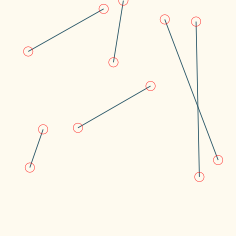

In [86]:
edges = np.random.rand(6,2,3)*100
Image(draw.draw_edges(edges, v=True))

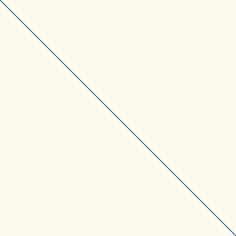

In [87]:
Image(draw.draw_edges(e*100))

In [88]:
def split(e, n):
    fracs = np.random.rand(n, 1)
    fracs.sort(axis=0)
    vector = e[1] - e[0]
    splits = np.multiply(fracs[::-1], vector) + e[0]
    points = np.concatenate((e[1].reshape(1,3),splits,e[0].reshape(1,3)))
    starts = points[:-1]
    ends = points[1:]
    edges = np.concatenate((starts.reshape(-1,1,3),ends.reshape(-1,1,3)),axis=1)
    return edges

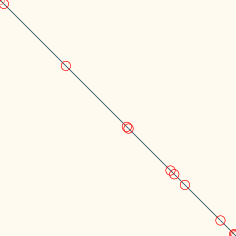

In [89]:
splits = split(e*100,10)

Image(draw.draw_edges(splits, v=True))

In [117]:
splits.shape

(11, 2, 3)

In [146]:
split_collection = EdgeCollection(splits, np.random.randn(*splits[:,0,:].shape), np.arange(splits.shape[0])/30)

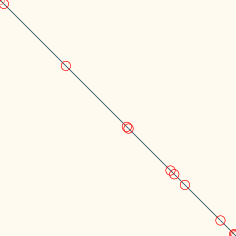

In [147]:
Image(draw.draw_edges(split_collection.edges, v=True))

In [148]:
c = np.repeat(split_collection.centers[:, np.newaxis, :], 2, axis=1)

In [149]:
split_collection.n 

11

rot_mat.shape=(11, 3, 3)
edge_centers.shape=(11, 2, 3)
centers_shifted.shape=(11, 2, 3)
rotated.shape=(11, 2, 3)
back_shifted.shape=(11, 2, 3)


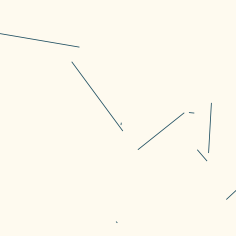

In [172]:
split_collection.step(1)
# split_collection.rotate_indiv(np.pi/50)
Image(draw.draw_edges(split_collection.edges, v=False))

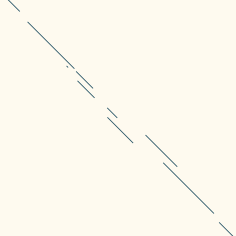

In [75]:
Image(draw.draw_edges(split_collection.rotate_indiv(np.pi/2).edges, v=False))

In [53]:
transform.rotation_matrix(np.pi, [0,0,1])

array([[-1.0000000e+00, -1.2246468e-16,  0.0000000e+00],
       [ 1.2246468e-16, -1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  1.0000000e+00]])

In [113]:
theta = np.random.randn(11)
normal = np.array([[0,0,1]]*11)
rot_mat = transform.multi_rot_mat(theta, [0,0,1])

In [116]:
rot_mat.shape

(11, 3, 3)

In [22]:
e = split_collection.edges

In [27]:
np.split(normal,3,axis=1)

[array([[0],
        [0]]),
 array([[0],
        [0]]),
 array([[1],
        [1]])]

In [39]:
np.split(np.divide(normal, np.linalg.norm(normal, axis=1)).reshape(1,2))

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

In [48]:
normal/[[2,1,1]]

array([[0., 0., 1.],
       [0., 0., 1.]])

In [45]:
normal.shape

(2, 3)

In [51]:
np.linalg.norm(normal, axis=1)

array([1., 1.])